# Image processing Project 1 :motion blur correction on image

Ariel halfon

Daniel Nachum Hadad

In [3]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from numpy import shape
import skimage
from PIL import Image
import cv2

from numpy.fft import fft2, ifft2
from scipy.signal import convolve2d as conv2

from imgaug.augmenters.blur import MotionBlur
from scipy.ndimage import rotate
from scipy import fftpack


from skimage.transform import radon,rescale
from colorsys import hls_to_rgb

from skimage.filters import window,wiener
from skimage.feature import peak_local_max
from skimage.morphology import local_minima

import scipy

import math

# Usful function

 motion blur filter 

In [1]:

def motion_blur(size, theta, img):
    #First generate a horizontal line across the middle
    kernel = np.zeros([size, size])
    # find point spread function depth
    size = float(size)
    depth = size / 8

    bottom = int(size / 2 - depth)
    top = int(size / 2 + depth) + 1
    kernel[bottom:top][0:int(size)] = 1

    # Then rotate to specified angle from scipy.ndimage
    kernel = rotate(kernel,theta)

    kernel = kernel / np.sum(kernel)
    img =  cv2.filter2D(img, -1, kernel)

    return img

function for display complx matrix

In [250]:
def colorize(z):  
    r = np.abs(z)
    arg = np.angle(z) 

    h = (arg + np.pi)  / (2 * np.pi) + 0.5
    l = 1.0 - 1.0/(1.0 + r**0.3)
    s = 0.8

    c = np.vectorize(hls_to_rgb) (h,l,s) # --> tuple
    c = np.array(c)  # -->  array of (3,n,m) shape, but need (n,m,3)
    c = c.swapaxes(0,2) 
    return c

winer filter 

In [1275]:

def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 5)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    return vector
   

def filter(img,impulse_response, estimation, gamma):
        output_dtft = fftpack.fft2(img)
        padded_impulse = np.pad(abs(impulse_response), int(abs((shape(img)[0]-shape(impulse_response)[0])/2)), pad_with, padder=0 )
        Hf = fftpack.fft2(padded_impulse)
        Hf=cv2.resize(img, (128,128), interpolation = cv2.INTER_AREA)
        Pyf = np.square(abs(output_dtft))/(shape(img)[0]**2)
        Pyf_log = np.log10(Pyf)

        Gf = np.divide(np.conjugate(Hf), (np.square(abs(Hf))+gamma))
        F_r = np.multiply(Gf, output_dtft)
        return fftpack.ifft2(F_r)

# project 1 Motion Blurr

# part 1

In [1155]:
# img1 = mpimg.imread('parrots.png')
img1 =np.array(Image.open('parrots.png').convert('L'))
# img2=mpimg.imread('dragon.png')
img2= np.array(Image.open('dragon.png').convert('L'))

img1=cv2.resize(img1, (500,500), interpolation = cv2.INTER_AREA)
img2=cv2.resize(img2, (500,500), interpolation = cv2.INTER_AREA)


In [1156]:
print('img1:',np.shape(img1))
print('img2:',np.shape(img2))



img1: (500, 500)
img2: (500, 500)


In [1158]:
img1=((img1)/(np.max(img1)-np.min(img1)))

img2=((img2)/(np.max(img2)-np.min(img2)))

In [436]:
# img_1=np.zeros(np.shape(img2))
# for i in range (np.shape(img1)[0]):
#     for j in range(np.shape(img1)[1]):
#         img_1[i][j]=img1[i][j]

# img1=img_1        


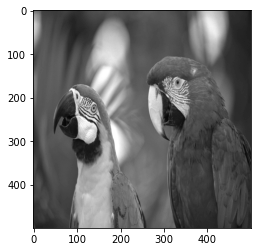

In [1159]:

imshow(img1,cmap='gray')
# print(img1)

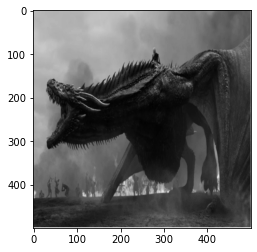

In [1160]:
imshow(img2,cmap='gray')
# print(img2)

In [1161]:
a=np.fft.fftshift(np.fft.fft2(img1))
b=np.fft.fftshift(np.fft.fft2(img2))

amp_a=np.real(a)
phase_a=np.imag(a)

amp_b=np.real(b)
phase_b=np.imag(b)

print('length of amp_a=',np.shape(amp_a),'length of phase_a',np.shape(phase_a))
print('length of amp_b=',np.shape(amp_b),'length of phase_b',np.shape(phase_b))


length of amp_a= (500, 500) length of phase_a (500, 500)
length of amp_b= (500, 500) length of phase_b (500, 500)


In [1176]:
a_new = amp_a + abs(phase_b)
b_new = amp_b + abs(phase_a)

In [1177]:
image1=np.fft.ifft2(a_new)
image2=np.fft.ifft2(b_new)

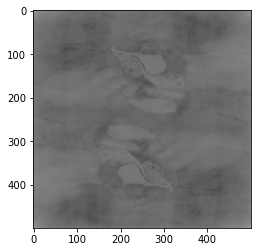

In [1181]:


# skimage.
image1_show = colorize(image1)
plt.imshow(image1_show[:,:,0],cmap='gray')
plt.show()


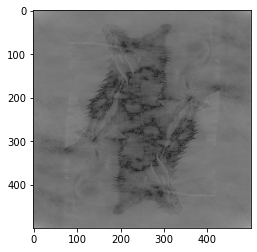

In [1182]:
image2_show = colorize(image2)
plt.imshow(image2_show[:,:,0],cmap='gray')
plt.show()

# part 2: randon transform

In [444]:
l=np.zeros([313,313])

for i in range(len(l)):
    for j in range(len(l)):
        l[j,39]=255
        l[j,79]=255
        l[j,123]=255
        l[j,149]=255
        


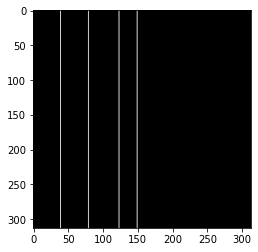

In [445]:
imshow(l,cmap=plt.cm.Greys_r)

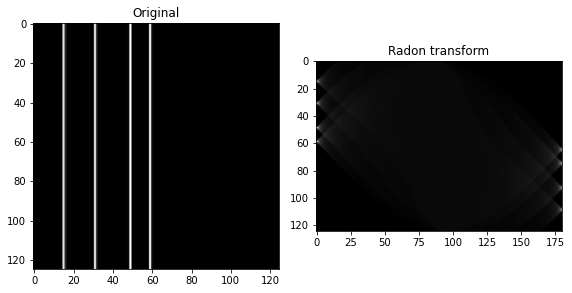

In [446]:
image = rescale(l, scale=0.4, mode='reflect', channel_axis=None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

sinogram = radon(image)

ax2.set_title("Radon transform")

ax2.imshow(sinogram, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()

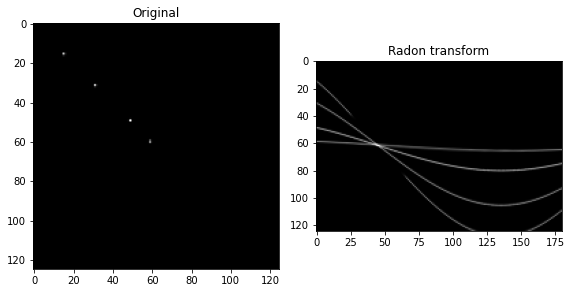

In [447]:
l=np.zeros([313,313])

for i in range(len(l)):
    for j in range(len(l)):
        l[39,39]=255
        l[79,79]=255
        l[123,123]=255
        l[150,149]=255


image = rescale(l, scale=0.4, mode='reflect', channel_axis=None)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

sinogram = radon(image)

ax2.set_title("Radon transform")

ax2.imshow(sinogram, cmap=plt.cm.Greys_r)

fig.tight_layout()
plt.show()        

# part 3 : motion blur

In [1211]:
len1=20
len2=40
phase=30
img1 =np.array(Image.open('parrots.png').convert('L'))

# img2= np.array(Image.open('dragon.png').convert('L'))

# img1= np.array(Image.open('parrots.png').convert('L'))

# img1= np.array(Image.open('dragon.png').convert('L'))


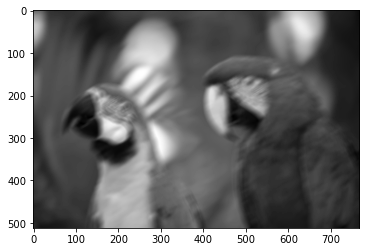

In [1212]:
f_b1=motion_blur(len1,phase,img1)
f_b2=motion_blur(len2,phase,img1)
imshow(f_b1,cmap='gray')

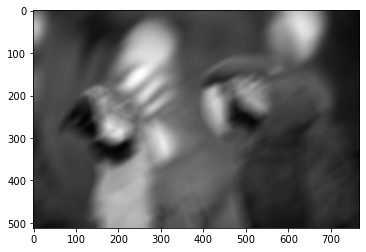

In [1189]:
imshow(f_b2,cmap='gray')

If we want image 2 "dragon"

In [269]:
# f_b1=motion_blur(len1,phase,img2)
# f_b2=motion_blur(len2,phase,img2)
# imshow(f_b1,cmap='gray')

In [270]:
# imshow(f_b2,cmap='gray')

fast fourier transform on the image 1

In [1213]:
a=np.fft.fftshift(np.fft.fft2(img1))
a_f1=np.fft.fftshift(np.fft.fft2(f_b1)) # with filter length=20
a_f2=np.fft.fftshift(np.fft.fft2(f_b2)) #with filter length=40

In [1214]:
a_show=colorize(a)
a_f1_show = colorize(a_f1)
a_f2_show=(colorize(a_f2))
# plt.imshow(a_f1_show[:,:,0],cmap='gray')
# plt.show()
# imshow(a_f1)

Text(0.5, 1.0, 'fft on image 1 :with filter length=20')

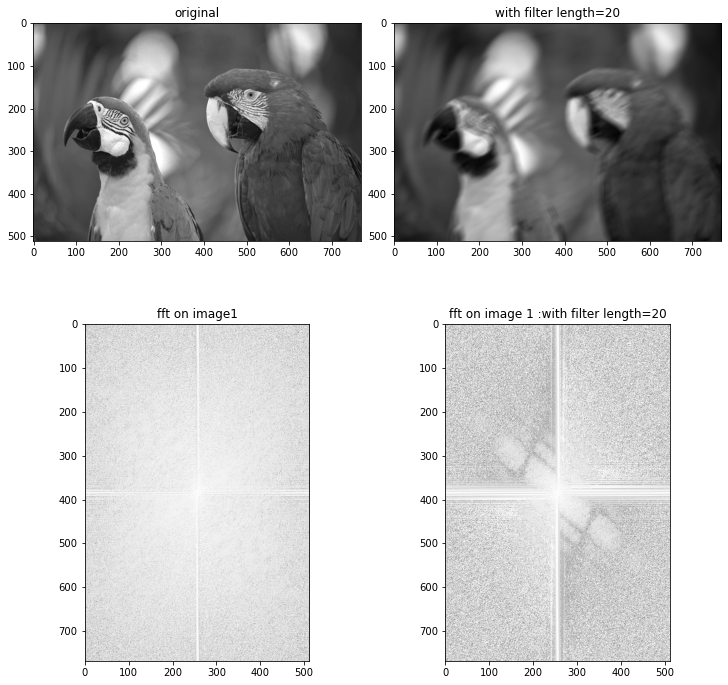

In [1215]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize = [10,10])

axs[0, 0].imshow(img1,cmap='gray')
axs[0, 0].set_title('original')

axs[1, 0].imshow(a_show[:,:,0],cmap='gray')
axs[1, 0].set_title('fft on image1')

axs[0, 1].imshow(f_b1,cmap='gray' )
axs[0, 1].set_title('with filter length=20')

axs[1, 1].imshow(a_f1_show[:,:,0],cmap='gray')
axs[1, 1].set_title('fft on image 1 :with filter length=20')


Text(0.5, 1.0, 'fft on image 1 :with filter length=40')

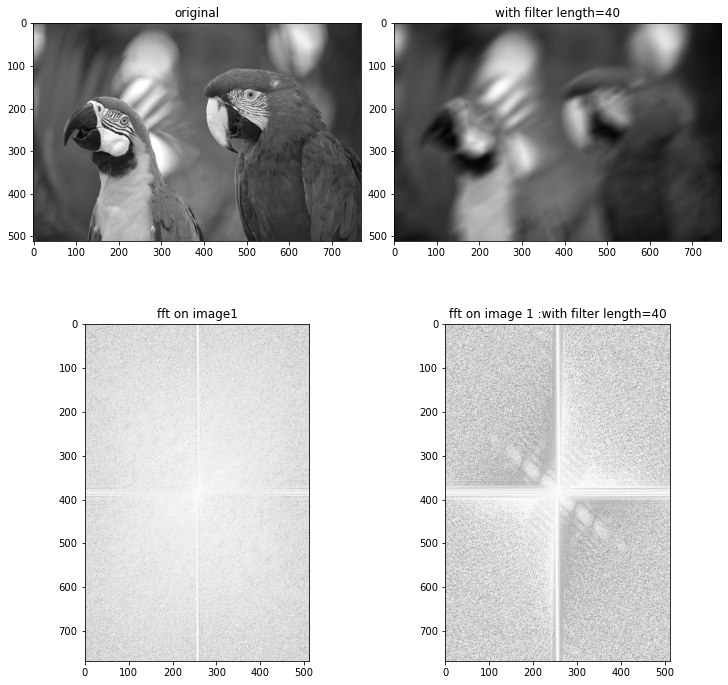

In [1216]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True,figsize = [10,10])

axs[0, 0].imshow(img1,cmap='gray')
axs[0, 0].set_title('original')

axs[1, 0].imshow(a_show[:,:,0],cmap='gray')
axs[1, 0].set_title('fft on image1')

axs[0, 1].imshow(f_b2,cmap='gray' )
axs[0, 1].set_title('with filter length=40')

axs[1, 1].imshow(a_f2_show[:,:,0],cmap='gray')
axs[1, 1].set_title('fft on image 1 :with filter length=40')

using article : "Review Of Motion Blur Estimation Techniques"
Algorithm2: Motion Blur Angle Estimation 

1. Convert blurred image f(x,y,3 ) to gray level image 
 f(x,y).
2. Perform Hann windowing over f(x,y ) to remove 
boundary artifacts. 
3. Compute the Fourier transform F(u,v) of step2 image. 
4. Compute the log spectrum of F(u,v) 
5. Repeat for α = 0 to 180
 Repeat for u = 0 to M-1 
 Repeat for v = 0 to N-1 
 { 
ρ= u cos α + v sin α
 g(ρ, α) = g(ρ, α) + g(ρ, α) δ(u cos α + v sin α -ρ) 
 } 
6. Find the peak in Radon transform matrix array which is 
corresponding to the motion blur angle. 

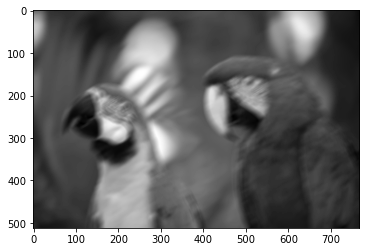

In [1217]:
imshow(f_b1,cmap='gray')

the estimatied angle is: 34


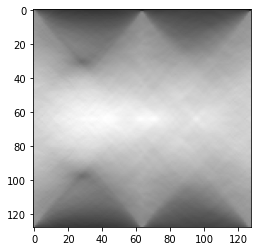

In [1229]:
img1 =np.array(Image.open('parrots.png').convert('L'))
# img1 =np.array(Image.open('dragon.png').convert('L'))

phase=30
len1=20
f_b1=motion_blur(len1,phase,img1)

# f_b1=f_b1/np.max(f_b1)

x=cv2.resize(f_b1, (128,128), interpolation = cv2.INTER_AREA)

wimage_1= x * window('hann', np.shape(x))


theta=np.linspace(0,180,len(x))

parrots_fft=np.fft.fftshift(np.fft.fft2(wimage_1))


parrots_log=np.log(parrots_fft)

parrots_log_fix=np.real(parrots_log)+i*np.imag(parrots_log)

parrots_radon=radon(abs(parrots_log),theta)

imshow(parrots_radon,cmap='gray')

max_peak=peak_local_max(parrots_radon, min_distance=25) #the first value is the max index [0][1]  
# max_peak=np.argmax(parrots_radon,axis=1)
print("the estimatied angle is:",max_peak[0][1])#  Index of X-axis






Algorithm4: Motion Blur Length Estimation:
1. Convert blurred image f(x,y,3 ) to gray level 
image (f,x ). 

2. Perform Hann windowing over the image f(x,y ) to 
remove boundary artifacts. 

3. Compute the Fourier transform F(u,v ) of step2 image. 

4. Compute the log spectrum of F(u,v ). 

5. Find the Radon transform of the log spectrum at the 
estimated angle.

6. Detect the all local minima in radon transform and 
average the distance between them as d. 

7. For an image of size N × N motion length is given by 
N/d.

In [1266]:
img1 =np.array(Image.open('parrots.png').convert('L'))
# img1 =np.array(Image.open('dragon.png').convert('L'))

phase=30
len1=20
f_b1=motion_blur(len1,phase,img1)

x=cv2.resize(f_b1, (128,128), interpolation = cv2.INTER_AREA)

wimage_1= x * window('hann', np.shape(x))

theta_len=np.linspace(max_peak[0][1],max_peak[0][1]+1,num=1)

parrots_fft=np.fft.fftshift(np.fft.fft2(wimage_1))

parrots_log=np.log(parrots_fft)

# parrots_log_fix=np.real(parrots_log)+np.imag(parrots_log)

parrots_radon=radon(abs(parrots_log),theta_len)


ind = local_minima(parrots_radon,indices=True)

d = np.zeros(np.shape(ind[0]))

for i in range(len(d)-1):
    d[i]=ind[0][i+1]-ind[0][i]

length_es=len(x)/d.mean()
print(d.mean())
print("estimated length of motion blur is :",(length_es))

8.466666666666667
estimated length of motion blur is : 15.118110236220472


In [1267]:
print(round(length_es))

15


Image recovery using Weiner filter
it didnt work on python so we did it on MATLAB

In [24]:
#this part not running!

# img1 =np.array(Image.open('parrots.png').convert('L'))

# phase=30
# len=20
# f_b1=motion_blur(len,phase,img1)

# fix_img=skimage.filters.wiener(f_b1,predefined_filter=motion_blur(20,30,img1)) 




In [25]:
# angle_estimation=max_peak[0][1]

# y=cv2.resize(f_b1, (128,128), interpolation = cv2.INTER_AREA)

# psf = motion_process(length_es, shape(y)) #length_es variable is the value that we get from radon transform 


# psf=cv2.resize(psf, [shape(y)[1],shape(y)[0]], interpolation = cv2.INTER_AREA)
# blur_kernel=motion_blur(int(np.round(length_es)),angle_estimation,psf)

# fixImg=filter(y,blur_kernel,length_es,angle_estimation)


# imshow(abs(fixImg),cmap='gray')


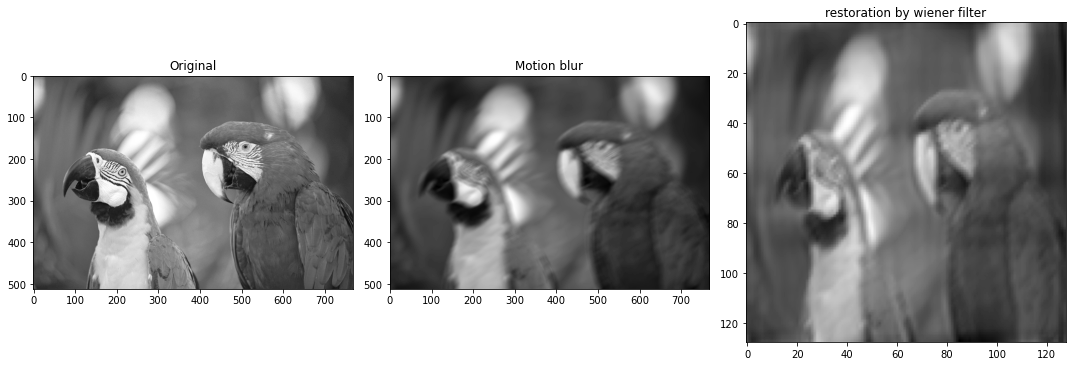

In [1273]:

# fixImg=fixImg/np.max(fixImg)
# f_b1=f_b1/np.max(f_b1)
# img1=img1/np.max(img1)

# fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(15, 15))

# ax1.set_title("Original")
# ax1.imshow(img1, cmap=plt.cm.Greys_r)

# ax2.set_title("Motion blur")

# ax2.imshow(f_b1,cmap='gray')

# ax3.set_title('restoration by wiener filter')
# # ax3.imshow(np.flip(np.rot90(colorize(fixImg)[:,:,0]),axis=0),cmap='gray')
# ax3.imshow(np.real(fixImg),cmap='gray')



# fig.tight_layout()
# plt.show()   


# part 5: Gabor filter

The steps of the algorithm for blur angle estimation are described
below.
1. The spectrum of the blurred image is computed.
2. Logarithm of the spectrum of the blurred image i.e. I =
log(G(u, v)) is used as input to the Gabor filter.
3. Gabor filter with different orientation (theta) are convolved with I
to get different responses R(theta).
4. For every theta, the L2 norm of the result of the convolution is calculated. The blurring angle is then calculated as,

   theta_blur= arg{max_theta R(thta)}

In [1276]:
parrot_blur=motion_blur(len1,phase,img1) #len1=20,phase=30,img1=parrots

# imshow(parrot_blur,cmap='gray')
f1=np.fft.fftshift(np.fft.fft2(parrot_blur))

theta=np.linspace(0,180,180,dtype=int)

parrots_log=np.log(f1)

r_g=np.zeros(len(theta))



for i in range(len(theta)):
    temp=skimage.filters.gabor(f1,frequency=1.75,theta=theta[i])
    r_g[i]=np.max(temp)
   



C:\Users\ariel\AppData\Local\Temp/ipykernel_41864/1986814087.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  r_g[i]=np.max(temp)


In [1277]:
print('The estimated angle by using Gabor filter is :',np.argmax(r_g))

The estimated angle by using Gabor filter is : 27


# part 6: Cepstrum 

One of the most significant properties of the cepstrum is the 
property of separability. The separability of T implies the following property. Assumef(x,y) is a separable function, i.e., can be 
expressed as 

as a results from that: 
The fact that the cepstrum transform maps convolution into 
addition may also be useful in image deblurring. In the cepstral 
domain the cepstrum of the image and the blur are added 
together thus making the detection of the blur easier


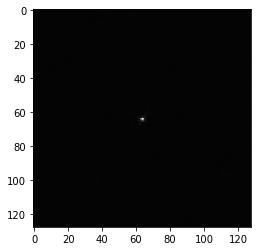

In [1285]:
# from scipy.ndimage import rotate
from skimage.transform import rotate
from skimage import img_as_float
img1 =np.array(Image.open('parrots.png').convert('L'))
parrot_blur=motion_blur(len1,phase,img1)

parrot_blur=cv2.resize(parrot_blur, (128,128), interpolation = cv2.INTER_AREA)
wimage_1

# imshow(parrot_blur,cmap='gray')

parrot_blur = (np.fft.fft2(parrot_blur))

parrot_blur = np.log10(parrot_blur)

parrot_Cepstrum = np.fft.ifftshift(np.fft.ifft2(np.real(parrot_blur)))




parrot_Cepstrum=rotate(np.real(parrot_Cepstrum), -30,resize=False,clip=False)

imshow(np.real(parrot_Cepstrum),cmap='gray')




In [1286]:
for i in range(shape(parrot_Cepstrum)[0]):
    for j in range(shape(parrot_Cepstrum)[1]):
        if np.real(parrot_Cepstrum[i,j])<0:
            print("the estimated length of the blur image is :",j)
            break
    break



the estimated length of the blur image is : 26


Application of the articles:

[1] “Review of Motion Blur Estimation Techniques”; Shamik Tiwari, V. P. Shukla, and A. K. Singh, Journal of Image and Graphics Vol. 1, No. 4, December 2013

[2]” Motion blur parameters estimation for image restoration”; Ratnakar Dash∗, Banshidhar Majhi, Optik 125 (2014) 1634–1640

[3] “On the Cepstrum of Two-Dimensional Functious”; RAPHAEL ROM, IEEE TRANSACTIONS ON INFORMATION THEORY, MARCH 1975
